In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'pdf'
!mkdir -p $folder


data = pd.read_csv('data.csv', index_col=0)
data.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,0.5,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0.756519,0.123426,0.156010,0.397855,0.689124,0.822287,0.059486,0.032697,0.175249,0.673825
1,0.5,0.5,0.0,0.0,0.0,0,0,0,0,0,...,0.416175,0.688381,0.876422,0.153659,0.406306,0.714781,0.452631,0.890333,0.495503,0.194227
2,0.5,0.5,0.5,0.0,0.0,0,0,0,0,0,...,0.400526,0.012098,0.391870,0.681438,0.714112,0.587022,0.997617,0.179406,0.094149,0.551203
3,0.5,0.5,0.5,0.5,0.0,0,0,0,0,0,...,0.153326,0.399814,0.843777,0.106176,0.125045,0.765685,0.582473,0.797105,0.886579,0.486906
4,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,...,0.569110,0.288521,0.049904,0.312614,0.213312,0.666463,0.798311,0.552320,0.399732,0.078480


In [3]:
mean = data.mean()
variance = data.var()
stddev = data.std()

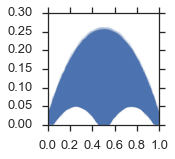

In [4]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(mean, variance, 'o', alpha=0.1)

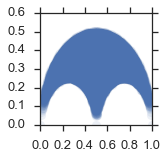

In [5]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(mean, stddev, 'o', alpha=0.1)

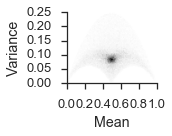

In [17]:
fig, ax = plt.subplots(figsize=(2.5, 2))
ax.hexbin(mean, variance)
ax.set(xlabel='Mean', ylabel='Variance')
sns.despine()
fig.tight_layout()
fig.savefig('{}/mean_vs_var_hexbin.pdf'.format(folder))

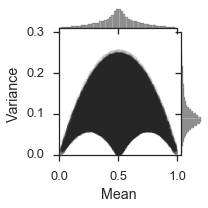

In [18]:
# fig, ax = plt.subplots(figsize=(2, 2))
g = sns.jointplot(mean, variance, alpha=0.1, color='#262626', size=3, stat_func=None, joint_kws=dict(rasterized=True))
g.ax_joint.set(xlabel='Mean', ylabel='Variance', xticks=(0, 0.5, 1), yticks=(0, 0.1, 0.2, 0.3), xlim=(0, 1), ylim=(0, 0.3))
# sns.despine()
fig.tight_layout()
fig.savefig('{}/mean_vs_var_scatter.pdf'.format(folder), dpi=600)

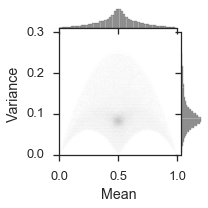

In [8]:
# fig, ax = plt.subplots(figsize=(2, 2))
g = sns.jointplot(mean, variance, alpha=0.1, color='#262626', size=3, stat_func=None, kind='hex')
g.ax_joint.set(xlabel='Mean', ylabel='Variance', xticks=(0, 0.5, 1), yticks=(0, 0.1, 0.2, 0.3), xlim=(0, 1), ylim=(0, 0.3))
# sns.despine()
fig.tight_layout()
fig.savefig('{}/mean_vs_var_hexbin.pdf'.format(folder))

### Make shuffled data to compare to JSD

In [9]:
np.random.seed(sum(map(ord, 'beyonce')))
shuffled_data = data.copy()
shuffled_columns = np.random.permutation(data.columns)
shuffled_data = shuffled_data[shuffled_columns]
shuffled_data.columns = data.columns
shuffled_data.head()

,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,1.000000,0,0.622234,0.637108,0.000000,0.889743,0,0.803556,0.000000,0,...,0.932852,0.264614,0.588628,0.756909,0.000000,0.000000,0.250492,1.000000,0.000000,1.000000
1,0.205484,0,0.768308,0.893993,0.978443,1.000000,1,0.127035,0.269371,0,...,0.724724,0.189781,1.000000,0.000000,0.000000,0.824932,0.701324,0.088347,0.783862,0.274544
2,0.118831,0,0.591002,0.492763,0.929639,0.839152,1,0.867767,0.000000,0,...,0.446803,0.311648,1.000000,0.000000,0.000000,0.000000,0.148938,1.000000,0.000000,0.790851
3,0.612001,0,0.426731,0.681949,0.000000,1.000000,1,0.982079,0.000000,0,...,1.000000,0.835272,1.000000,0.000000,0.508689,0.000000,0.000000,0.831429,0.000000,0.501660
4,0.745598,0,0.586912,0.796738,0.000000,0.591420,1,0.212199,0.000000,0,...,1.000000,0.450284,0.621685,0.000000,0.000000,0.000000,0.952146,1.000000,0.000000,0.892247


In [10]:
shuffled_data.to_csv('shuffled_data.csv')

### Calculate waypoints of shuffled data

In [11]:
# Initialize the waypoints transformer
ws = bonvoyage.Waypoints()

shuffled_waypoints = ws.fit_transform(shuffled_data)
six.print_(shuffled_waypoints.shape)
shuffled_waypoints.head()

(60300, 2)


,0,1
perfect_middle_noise0_iter0,0.05,0.22
middle0_00_noise0_iter0,0.22,0.00
middle0_01_noise0_iter0,0.09,0.08
middle0_02_noise0_iter0,0.06,0.09
middle0_03_noise0_iter0,0.19,0.39


In [12]:
shuffled_waypoints.to_csv('shuffled_waypoints.csv')

In [13]:
bins = np.arange(0, 1.1, .1)
six.print_(bins)


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [14]:

import anchor
jsd = anchor.infotheory.binify_and_jsd(data, shuffled_data, 'data vs shuffled', bins)

In [15]:
jsd.head()

perfect_middle_noise0_iter0    0.694936
middle0_00_noise0_iter0        0.352927
middle0_01_noise0_iter0        0.820496
middle0_02_noise0_iter0        0.715798
middle0_03_noise0_iter0        0.883050
Name: data vs shuffled, dtype: float64

### Combine waypoints into one dataframe

In [16]:
waypoints = pd.read_csv('waypoints.csv', index_col=0)
waypoints.head()

IOError: File waypoints.csv does not exist

In [ ]:
waypoints.columns

In [ ]:
shuffled_waypoints.columns

In [ ]:
waypoints.columns = shuffled_waypoints.columns

In [ ]:
waypoints['phenotype'] = 'original'
shuffled_waypoints['phenotype'] = 'shuffled'

waypoints_combined = pd.concat([waypoints, shuffled_waypoints])
waypoints_combined = waypoints_combined.set_index('phenotype', append=True)
waypoints_combined.index = waypoints_combined.index.swaplevel(0, 1)
waypoints_combined = waypoints_combined.sort_index()
waypoints_combined.head()

In [ ]:
v = bonvoyage.Voyages()
voyages = v.voyages(waypoints_combined, [('original', 'shuffled')])

In [ ]:
voyages.head()

In [ ]:
voyages = voyages.set_index('event_id')
voyages.head()

In [ ]:
voyages['magnitude'].corr(jsd)

In [ ]:
jsd.corr(voyages['magnitude'])

In [ ]:
voyages['magnitude'].describe()

In [ ]:
g = sns.jointplot(voyages['magnitude'], jsd,)

In [ ]:
g = sns.jointplot(voyages['magnitude'], jsd, kind='hex', color='#262626', size=3, stat_func=None)
g.ax_joint.set(xlabel='Voyages', ylabel='JSD', xticks=(0, 0.4, 0.8, 1.2), yticks=(0, 0.5, 1))
g.savefig('{}/jsd_vs_voyages.pdf'.format(folder))